# Task-3: Iris Classification

## Importing Libraries

In [116]:
#General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Importing Data

In [118]:
df=pd.read_csv("IRIS.csv")

In [119]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preprocessing

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Missing value check

In [123]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No missing values to impute/drop

### Outlier Check(BoxPlot)

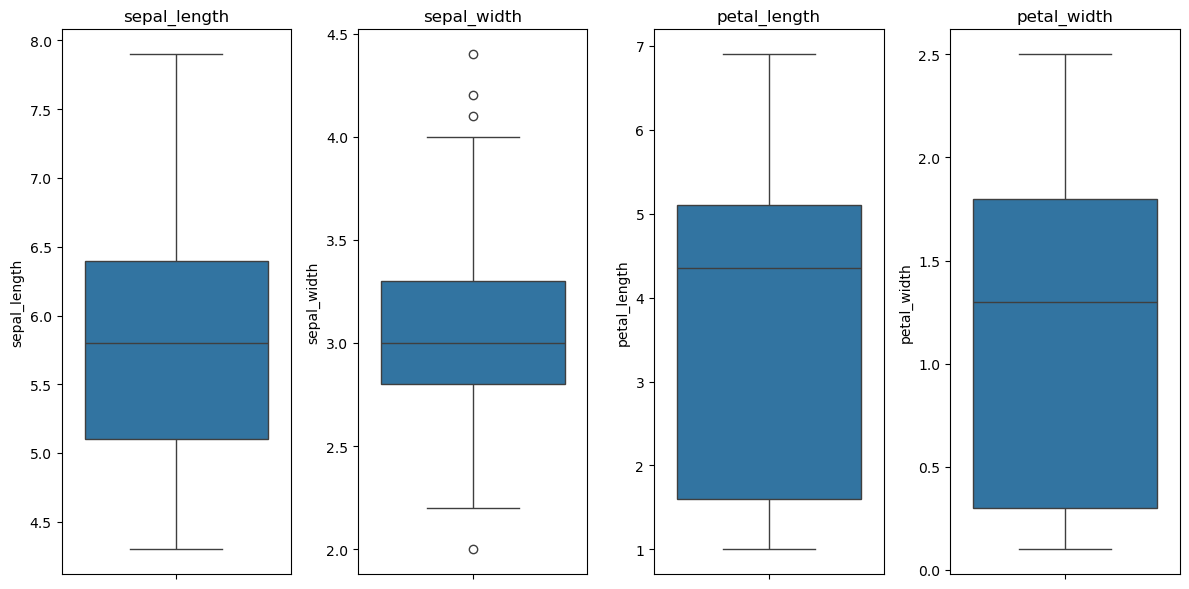

In [126]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

No significant outliers

### Features and study variables

In [129]:
X=df.drop("species",axis=1)
y=df["species"]

### Scaling features

In [131]:
scaler=StandardScaler()

In [132]:
X=scaler.fit_transform(X)

## EDA

In [134]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Normality of features

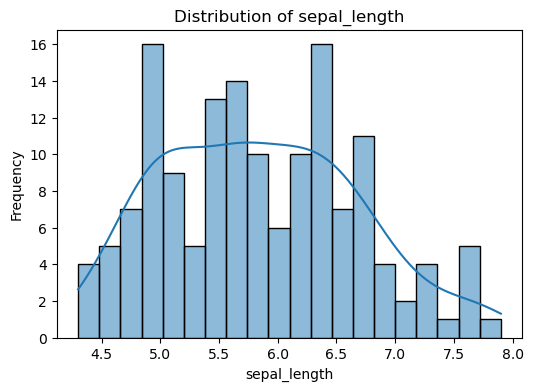

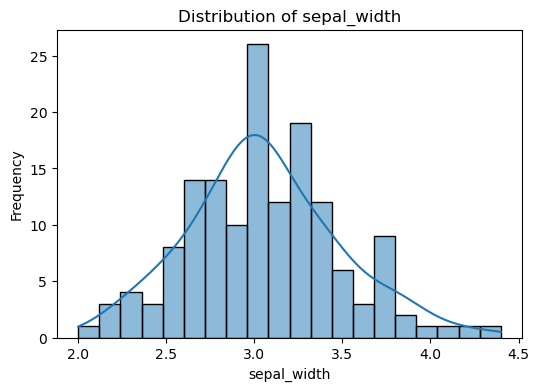

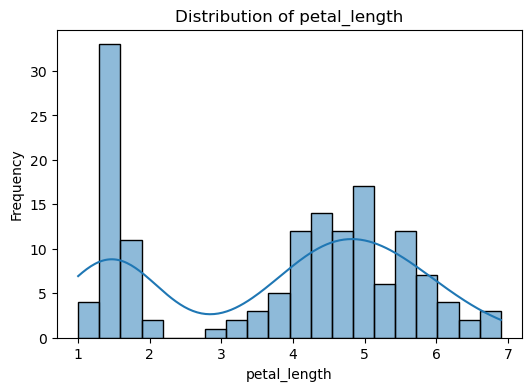

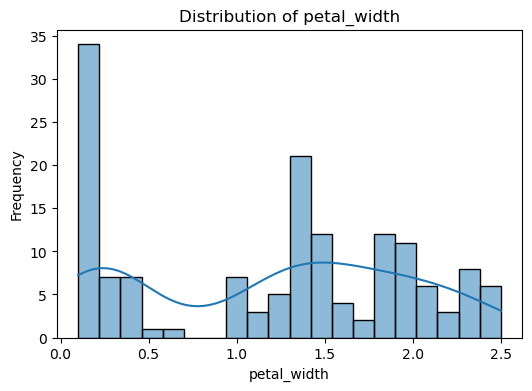

In [136]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

We can see scaled features are all almost normal shaped.

### Train-Test Split

In [139]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=75,random_state=42)

## Model Training

### Model Selection

In [142]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3)
}

In [143]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.2f}")

Logistic Regression: Accuracy = 0.99
Decision Tree: Accuracy = 0.92
KNN (k=3): Accuracy = 0.97


### Final Model Evaluation

Chosen model is logistic regression

In [146]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [147]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9866666666666667

Confusion Matrix:
 [[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.96      1.00      0.98        23
 Iris-virginica       1.00      0.96      0.98        23

       accuracy                           0.99        75
      macro avg       0.99      0.99      0.99        75
   weighted avg       0.99      0.99      0.99        75



## Conclusion

1. Only 1 misclassification (Iris-virginica mispredicted as Iris-versicolor).
2. Perfect classification on setosa
3. Tiny confusion between virginica and versicolor.
4. Overall accuracy of classification 99%

## Final prediction

In [169]:
pred=model.predict(X)
results=pd.DataFrame({"Actual species":y,"Predicted species":pred})
results

,Actual species,Predicted species
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica
